In [1]:
import pandas as pd
import seaborn as sns


In [7]:
df = pd.read_csv("case.csv")
idr = pd.read_csv("matrix_noHMM_output_case.csv")
idr.columns = ['gene']+[idr.columns[1]]

In [9]:
print(df.head())
print(idr.head())

   gene  sample_A   sample_B
0     0  5.942026   9.258713
1     1  4.375271   9.559976
2     2  5.336131  10.865068
3     3  3.718109   8.093338
4     4  5.155886  10.085152
   gene  IDR-sample_A-sample_B
0     0               0.567492
1     1               0.731845
2     2               0.120963
3     3               0.731845
4     4               0.128621


In [10]:
mdf = pd.merge(df, idr, on='gene')

In [11]:
data = mdf.loc[:, ['gene', 'sample_A', 'sample_B', 'IDR-sample_A-sample_B']]
data.columns = ['gene', 'x', 'y', 'IDR']
print(data)

     gene         x          y       IDR
0       0  5.942026   9.258713  0.567492
1       1  4.375271   9.559976  0.731845
2       2  5.336131  10.865068  0.120963
3       3  3.718109   8.093338  0.731845
4       4  5.155886  10.085152  0.128621
..    ...       ...        ...       ...
995   995  5.668469  10.181031  0.126365
996   996  5.907595  11.062978  0.061510
997   997  5.645716   9.341928  0.548561
998   998  6.137506  12.992239  0.563266
999   999  3.609767  10.083893  0.731845

[1000 rows x 4 columns]


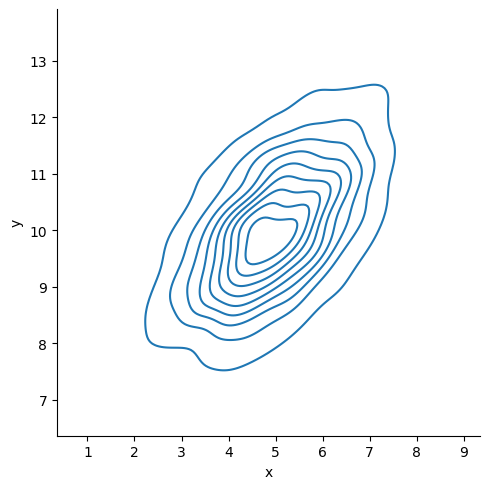

In [12]:
sns.displot(data, x='x', y='y', kind='kde')

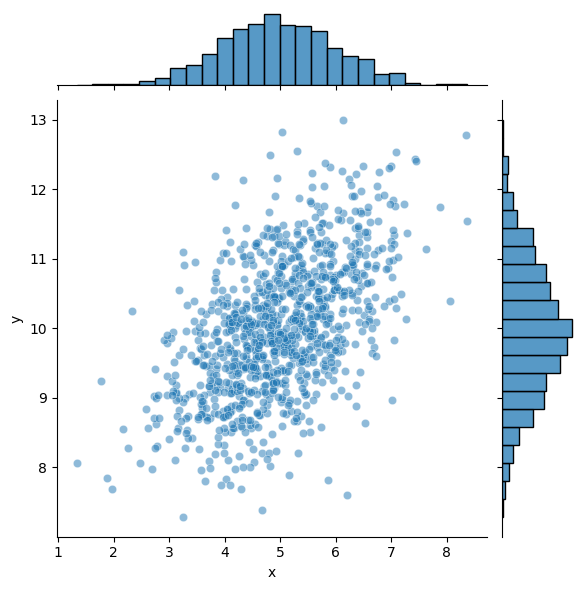

In [13]:
sns.jointplot(data, x='x', y='y', alpha=0.5)

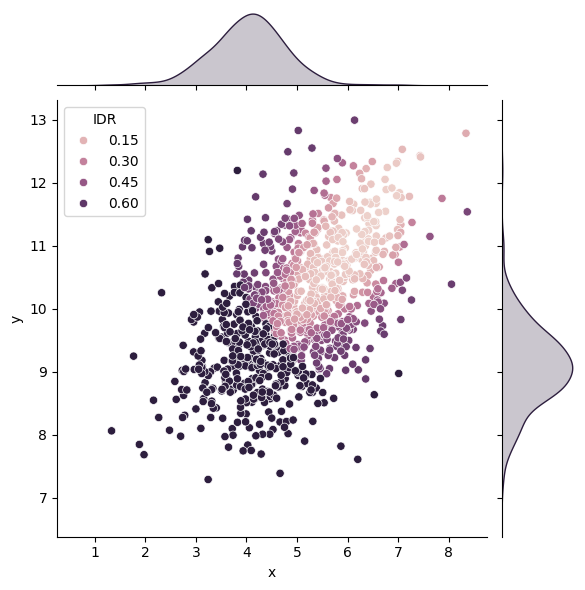

In [17]:
g = sns.jointplot(data, x='x', y='y', hue='IDR')

<Axes: xlabel='IDR', ylabel='Count'>

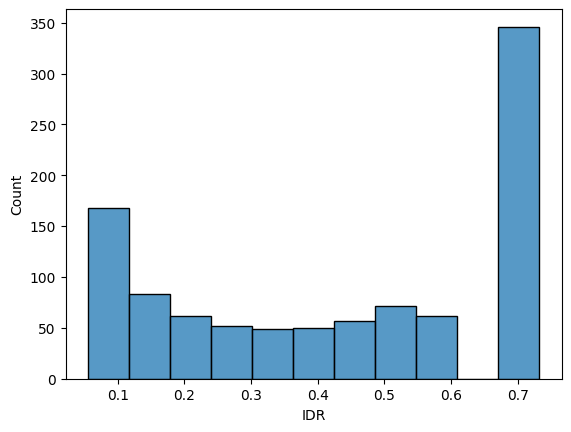

In [16]:
sns.histplot(data, x='IDR')

In [18]:
import scipy.stats
data = data.dropna()
print(scipy.stats.spearmanr(data.loc[:, ['x', 'y']].dropna()))

SignificanceResult(statistic=np.float64(0.5236916116916117), pvalue=np.float64(1.6365022945646146e-71))
